# Variables with tensorflow
Jupyter notebook work-flow showing the properties of variables in tensorflow

In [234]:
#interactive functionality of jupyter
%pylab inline 
import tensorflow as tf 


Populating the interactive namespace from numpy and matplotlib


#### Variables are used to define static constants for your graph to access.
tf.Variable and tf.get_variable is the accepted way to do this.

In [199]:
tf.reset_default_graph() #If running multiple times will clear all variables.

#A Session object encapsulates the environment in which Operation objects are executed, 
#and Tensor objects are evaluated
sess = tf.InteractiveSession() 

python_pointer_a = tf.Variable([0.5,0.1,0.2],name="a") #an array.
python_pointer_b = tf.Variable(0.5,name="b") #a single constant float32
values = np.ones((3,3))
python_pointer_c = tf.Variable(values,name="c") #by default will be float64 as defined by numpy array.

#More recently get_variable is being used which allows some additional behaviours.
python_pointer_d = tf.get_variable("d",initializer=0.5) #a single constant float32 like in b.
#The following defines the name of the tensor within tensorflow "e" the size [3,3].
values = np.ones((3,3))
python_pointer_e = tf.get_variable("e",[3,3],initializer = tf.constant_initializer(values)) #here the second argument is shape. 
#You can just insert values directly also. No need to specify shape in this case.
python_pointer_f = tf.get_variable("f",initializer=np.ones((3,3))) 


print(python_pointer_a)
print(python_pointer_b)
print(python_pointer_c,"note the dtype")#note the dtype.
print(python_pointer_d)
print(python_pointer_e)
print(python_pointer_f)


sess.run(tf.global_variables_initializer())
print('python_pointer_a',sess.run(python_pointer_a))
print('python_pointer_b',sess.run(python_pointer_b))
print('python_pointer_c',sess.run(python_pointer_c))
print('python_pointer_d',sess.run(python_pointer_d))
print('python_pointer_e',sess.run(python_pointer_e))
print('python_pointer_f',sess.run(python_pointer_f))
sess.close()

<tf.Variable 'a:0' shape=(3,) dtype=float32_ref>
<tf.Variable 'b:0' shape=() dtype=float32_ref>
<tf.Variable 'c:0' shape=(3, 3) dtype=float64_ref> note the dtype
<tf.Variable 'd:0' shape=() dtype=float32_ref>
<tf.Variable 'e:0' shape=(3, 3) dtype=float32_ref>
<tf.Variable 'f:0' shape=(3, 3) dtype=float64_ref>
python_pointer_a [ 0.5  0.1  0.2]
python_pointer_b 0.5
python_pointer_c [[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
python_pointer_d 0.5
python_pointer_e [[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
python_pointer_f [[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [200]:
##Two ways to reference your tensors to define the edges.
##by python pointers. Prefered.
out_a = tf.multiply(python_pointer_a,python_pointer_b)
##by tensorflow name, bit of a mouth full. But good for inspecting the network structure.
out_b = tf.multiply(tf.get_default_graph().get_tensor_by_name("a:0"),tf.get_default_graph().get_tensor_by_name("b:0"))

In [201]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())# initializes global variables in the graph.
print(sess.run(out_a), "out_a")
print(sess.run(out_b), "out_b")
sess.close()


[ 0.25  0.05  0.1 ] out_a
[ 0.25  0.05  0.1 ] out_b


## Tensor names

the name of a Tensor is the concatenation of the name of the operation that produced it, a colon (:), and the index of that tensor in the outputs of the operation that produced it. 
You can also give Tensors your own names.

Variables also have potentially a scope e.g. "one/v:0"

### Important difference between tf.Variable and tf.get_variable
tf.variable will always create a new variable and if a duplicate name is in scope it will create a new name.

In [236]:
tf.reset_default_graph()#Clears all variables.

sess = tf.InteractiveSession()#Start a new session.

try:
    a = tf.Variable(0.2,name="v")
    b = tf.Variable(1.2,name="v")
    c = tf.Variable(2.4,)
except:
    
    pass


print(a)
print(b,"notice the name isn't repeated it has been appended to make it safe.")
print(c,"comes up with its own name")

sess.run(tf.global_variables_initializer())

print('a',sess.run(a))
print('b',sess.run(b))
print('c',sess.run(c))

try:
    d = tf.get_variable("v", [0.2]) #a.name == "one/v:0"
    e = tf.get_variable("v", [1.1]) #ValueError: Variable one/v already exists
except:
    print("Doesn't work with get_variable #ValueError: Variable one/v already exists")

sess.close()

<tf.Variable 'v:0' shape=() dtype=float32_ref>
<tf.Variable 'v_1:0' shape=() dtype=float32_ref> notice the name isn't repeated it has been appended to make it safe.
<tf.Variable 'Variable:0' shape=() dtype=float32_ref> comes up with its own name
a 0.2
b 1.2
c 2.4
Doesn't work with get_variable #ValueError: Variable one/v already exists


### Example of some operations on 2-D arrays

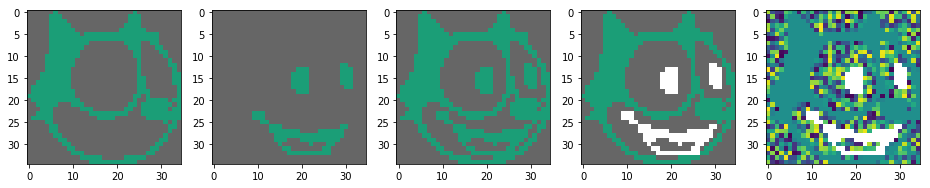

In [237]:
## Just a little fun example for an input matrix. 
## Taken from http://www.uff.br/cdme/matrix/matrix-html/matrix_boolean/matrix_boolean_en.html

def text_file_to_import(file_path):
    input_arr = []
    f = open(file_path,'r')
    lines = f.readlines()
    for line in lines:
        input_arr.extend(line.split('\n')[0].split('\t'))
    return np.array(input_arr).reshape(35,35).astype(np.int32)
face_only = text_file_to_import('felix images/felix_face.txt') 
smile_only = text_file_to_import('felix images/felix_smile.txt')


tf.reset_default_graph()#Clears all variables.
sess = tf.InteractiveSession()#Start a new session.


fc = tf.get_variable('face_only',face_only.shape,initializer=tf.constant_initializer(face_only),dtype=float32)
so = tf.get_variable('smile_only',smile_only.shape,initializer=tf.constant_initializer(smile_only),dtype=float32)
rn = tf.get_variable('random',face_only.shape)
sess.run(tf.global_variables_initializer())# initializes global variables in the graph.
out = tf.bitwise.bitwise_and(face_only,smile_only)
toFloat = tf.to_float(out,name='ToFloat')#Needed to convert the tf bitwise_and.


figure(figsize(16,4))
subplot(1,5,1)
imshow(sess.run(fc),cmap='Dark2')
subplot(1,5,2)
imshow(sess.run(so),cmap='Dark2')
subplot(1,5,3)
imshow(sess.run(out),cmap='Dark2')
subplot(1,5,4)
out = tf.divide(toFloat,so)
imshow(sess.run(out),cmap='Dark2')
subplot(1,5,5)
out = tf.multiply(rn,out)

imshow(sess.run(out))

sess.close()